In [90]:
import pandas as pd
import numpy as np
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *


init_notebook_mode(connected=True) 


import time
import matplotlib.dates as mdates
from datetime import datetime

import sklearn
from sklearn import preprocessing

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# bitcoin_df = pd.read_csv('bitcoin_data.csv')
# bitcoin_df.head()
# bitcoin_df.describe()
# bitcoin_df.info()

In [65]:
# get market info for bitcoin from the start of 2013 to the current day
bitcoin_df = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_df = bitcoin_df.assign(Date=pd.to_datetime(bitcoin_df['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_df.loc[bitcoin_df['Volume']=="-",'Volume']=0
# convert to int
bitcoin_df['Volume'] = bitcoin_df['Volume'].astype('int64')
# sort values from most recent to January 2017
bitcoin_df = bitcoin_df.sort_values('Date',ascending=True)

In [66]:
bitcoin_df.head()
bitcoin_df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1810,2013-04-28,135.30,135.98,132.10,134.21,0,1500520000
1809,2013-04-29,134.44,147.49,134.00,144.54,0,1491160000
1808,2013-04-30,144.00,146.93,134.05,139.00,0,1597780000
1807,2013-05-01,139.00,139.89,107.72,116.99,0,1542820000
1806,2013-05-02,116.38,125.60,92.28,105.21,0,1292190000


,Date,Open,High,Low,Close,Volume,Market Cap
4,2018-04-08,6919.98,7111.56,6919.98,7023.52,3652500000,117392000000
3,2018-04-09,7044.32,7178.11,6661.99,6770.73,4894060000,119516000000
2,2018-04-10,6795.44,6872.41,6704.15,6834.76,4272750000,115306000000
1,2018-04-11,6843.47,6968.32,6817.59,6968.32,4641890000,116126000000
0,2018-04-12,6955.38,7899.23,6806.51,7889.25,8906250000,118048000000


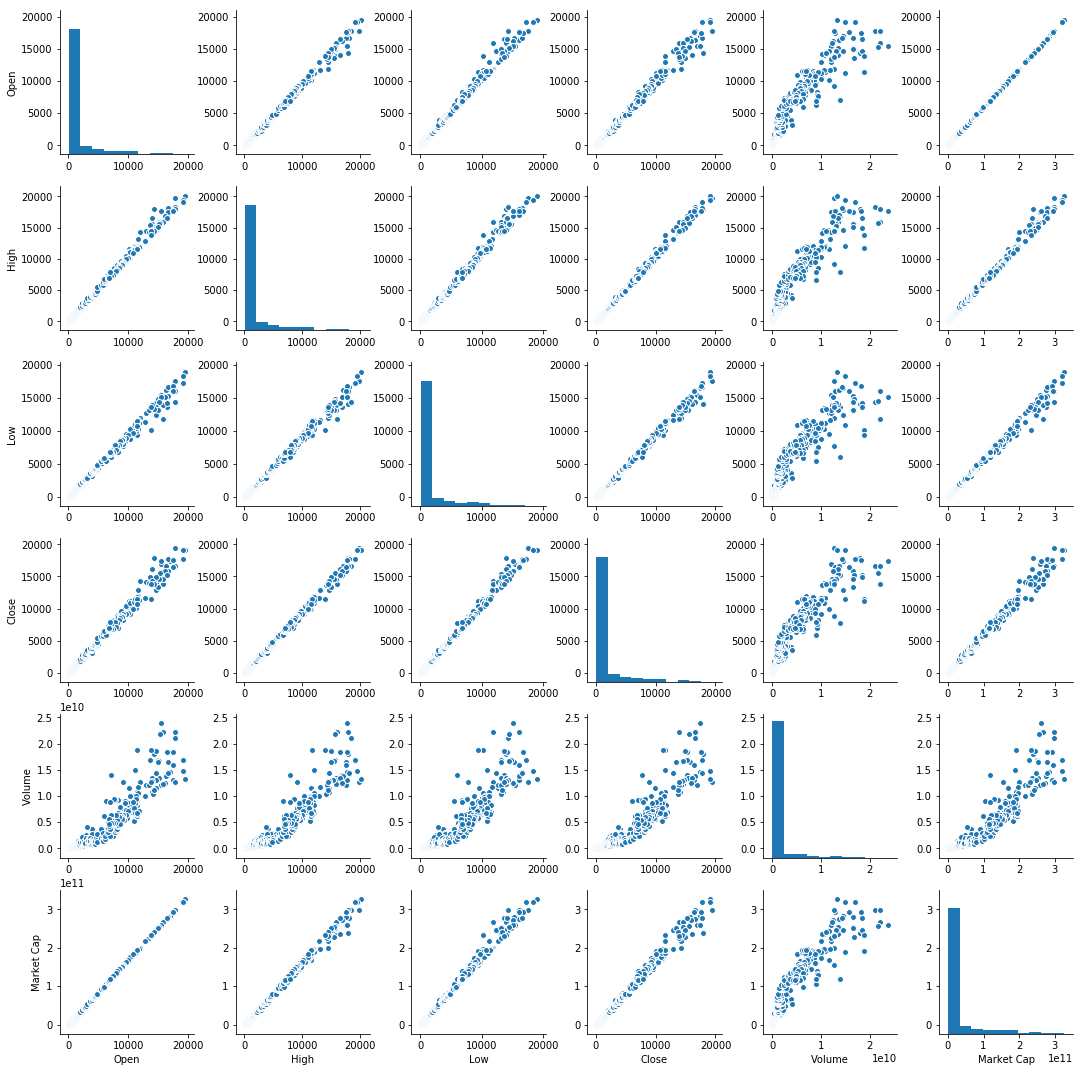

In [67]:
# To explore the relationship between each feature
sns.pairplot(bitcoin_df,palette='bwr')

In [68]:
bitcoin_close = Scatter(
  x=bitcoin_df['Date'],
  y=bitcoin_df['Close']
)

data = Data([bitcoin_close])

iplot(data)

In [69]:
bitcoin_2017 = bitcoin_df[(bitcoin_df['Date']>'2016-12-31')]

bitcoin_2017.head(15)
bitcoin_2017.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
466,2017-01-01,963.66,1003.08,958.70,998.33,147775000,15491200000
465,2017-01-02,998.62,1031.39,996.70,1021.75,222185000,16055100000
464,2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000,16426600000
463,2017-01-04,1044.40,1159.42,1044.40,1154.73,344946000,16795400000
462,2017-01-05,1156.73,1191.10,910.42,1013.38,510199000,18604000000
461,2017-01-06,1014.24,1046.81,883.94,902.20,351876000,16314100000
460,2017-01-07,903.49,908.59,823.56,908.59,279550000,14534400000
459,2017-01-08,908.17,942.72,887.25,911.20,158715000,14611400000
458,2017-01-09,913.24,913.69,879.81,902.83,141877000,14694900000
457,2017-01-10,902.44,914.87,901.06,907.68,115808000,14522600000


,Date,Open,High,Low,Close,Volume,Market Cap
4,2018-04-08,6919.98,7111.56,6919.98,7023.52,3652500000,117392000000
3,2018-04-09,7044.32,7178.11,6661.99,6770.73,4894060000,119516000000
2,2018-04-10,6795.44,6872.41,6704.15,6834.76,4272750000,115306000000
1,2018-04-11,6843.47,6968.32,6817.59,6968.32,4641890000,116126000000
0,2018-04-12,6955.38,7899.23,6806.51,7889.25,8906250000,118048000000


In [70]:
bitcoin_2017=bitcoin_2017[["Date","Open","Close"]]
bitcoin_2017['Change'] = bitcoin_2017['Close'] - bitcoin_2017['Open']
bitcoin_2017.head()

,Date,Open,Close,Change
466,2017-01-01,963.66,998.33,34.67
465,2017-01-02,998.62,1021.75,23.13
464,2017-01-03,1021.60,1043.84,22.24
463,2017-01-04,1044.40,1154.73,110.33
462,2017-01-05,1156.73,1013.38,-143.35


In [72]:
change_dummy = []
for i, row in bitcoin_2017.iterrows():
    if row.Change >= 0:
        pos = 1
        change_dummy.append(pos)
        
    else:
        neg = 0
        change_dummy.append(neg)

bitcoin_2017['Change_dummy'] = change_dummy
bitcoin_2017.head()
        

,Date,Open,Close,Change,Change_dummy
466,2017-01-01,963.66,998.33,34.67,1
465,2017-01-02,998.62,1021.75,23.13,1
464,2017-01-03,1021.60,1043.84,22.24,1
463,2017-01-04,1044.40,1154.73,110.33,1
462,2017-01-05,1156.73,1013.38,-143.35,0


In [92]:
# Normalize bitcoin_2017 dataframe
bitcoin_2017['Close_norm'] = (bitcoin_2017.Close - bitcoin_2017.Close.min()) / (bitcoin_2017.Close.max() - bitcoin_2017.Close.min())

In [93]:
bitcoin_2017.head()
bitcoin_2017.tail()

,Date,Open,Close,Change,Change_dummy,Close_norm
466,2017-01-01,963.66,998.33,34.67,1,0.011783
465,2017-01-02,998.62,1021.75,23.13,1,0.013034
464,2017-01-03,1021.60,1043.84,22.24,1,0.014214
463,2017-01-04,1044.40,1154.73,110.33,1,0.020138
462,2017-01-05,1156.73,1013.38,-143.35,0,0.012587


,Date,Open,Close,Change,Change_dummy,Close_norm
4,2018-04-08,6919.98,7023.52,103.54,1,0.333647
3,2018-04-09,7044.32,6770.73,-273.59,0,0.320143
2,2018-04-10,6795.44,6834.76,39.32,1,0.323564
1,2018-04-11,6843.47,6968.32,124.85,1,0.330699
0,2018-04-12,6955.38,7889.25,933.87,1,0.379895


In [73]:
twitter_test_df = pd.read_csv('first_df_test.csv')

In [94]:
twitter_test_df = twitter_test_df[['tweet_source','tweet_date','mean_tweet_vader_score']]
twitter_test_df = twitter_test_df.assign(tweet_date=pd.to_datetime(twitter_test_df['tweet_date']))

# Normalize twitter_test_df dataframe
twitter_test_df['mean_tweet_vader_score_norm'] = (twitter_test_df.mean_tweet_vader_score - twitter_test_df.mean_tweet_vader_score.min()) / (twitter_test_df.mean_tweet_vader_score.max() - twitter_test_df.mean_tweet_vader_score.min())

twitter_test_df.head()


,tweet_source,tweet_date,mean_tweet_vader_score,mean_tweet_vader_score_norm
0,Gavin Andresen,2018-01-04,-0.149967,0.363352
1,Gavin Andresen,2018-01-05,0.154420,0.564321
2,Gavin Andresen,2018-01-06,-0.239050,0.304536
3,Gavin Andresen,2018-01-07,0.255300,0.630926
4,Gavin Andresen,2018-01-08,0.525467,0.809301


In [95]:
bitcoin_close = Scatter(
  x=bitcoin_2017['Date'],
  y=bitcoin_2017['Close_norm']
)

# twitter_test_plot = Scatter(
#   x=twitter_test_df['tweet_date'],
#   y=twitter_test_df['mean_tweet_vader_score']
# ) 

data_combined = Data([bitcoin_close])

iplot(data_combined)

In [96]:
twitter_test_plot = Scatter(
  x=twitter_test_df['tweet_date'],
  y=twitter_test_df['mean_tweet_vader_score']
) 

data_combined = Data([twitter_test_plot])

iplot(data_combined)

In [97]:
bitcoin_test = Scatter(
  x=bitcoin_2017['Date'],
  y=bitcoin_2017['Close_norm']
)
twitter_test = Scatter(
  x=twitter_test_df['tweet_date'],
  y=twitter_test_df['mean_tweet_vader_score']
) 

data = [bitcoin_test, twitter_test]
iplot(data, filename='Bitcoin/Tweets')